Найдено файлов: 24
Загружено: 24 файлов
Классы: {'UNBAL': 4, 'BROKEN': 4, 'H': 4, 'MISAL': 4, 'BOW': 4, 'BF': 4}

Форма сигнала: (163840, 5)
Колонки: время + 4 канала


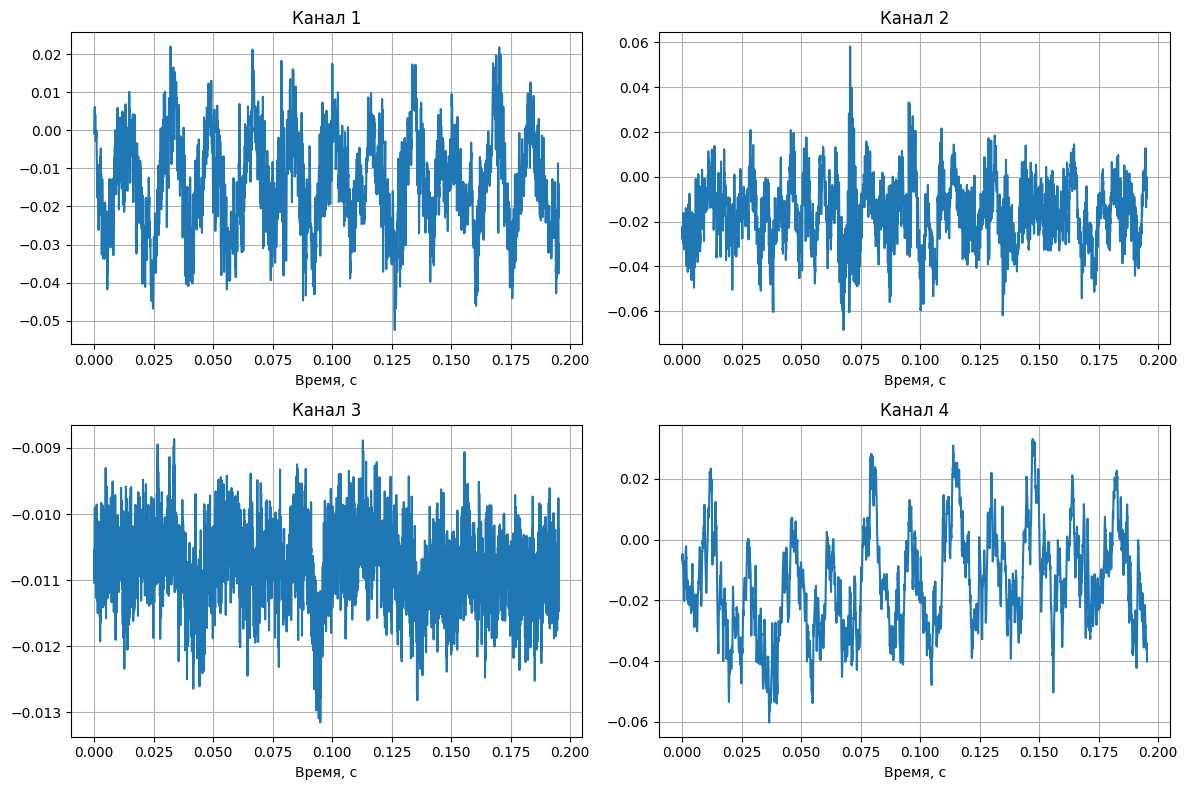


Массив сигналов: (24, 163840)
Длительность: 6.40 с

Данные сохранены
Сигналов: 24, классов: 6


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

# Конфигурация
DATA_PATH = '/content/Raw data'
SAMPLE_RATE = 25600

fault_to_label = {
    'H': 0, 'BF': 1, 'BOW': 2,
    'BROKEN': 3, 'MISAL': 4, 'UNBAL': 5
}

def extract_fault_type(filename):
    name = filename.replace('.txt', '')
    return name.split('_')[0]

def extract_frequency(filename):
    name = filename.replace('.txt', '')
    return int(name.split('_')[1].replace('HZ', ''))

def load_signal(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        try:
            float(line.strip().split()[0])
            return np.loadtxt(filepath, skiprows=i)
        except:
            continue
    return None

files = [f for f in os.listdir(DATA_PATH) if f.endswith('.txt')]
print(f"Найдено файлов: {len(files)}")

data_records = []
signals = []

for f in files:
    path = os.path.join(DATA_PATH, f)
    signal_data = load_signal(path)

    if signal_data is not None:
        signals.append(signal_data)
        data_records.append({
            'filename': f,
            'fault_type': extract_fault_type(f),
            'frequency': extract_frequency(f),
            'signal': signal_data
        })

df = pd.DataFrame(data_records)
df['label'] = df['fault_type'].map(fault_to_label)

print(f"Загружено: {len(df)} файлов")
print(f"Классы: {df['fault_type'].value_counts().to_dict()}")

# Проверка структуры данных
print(f"\nФорма сигнала: {signals[0].shape}")
print(f"Колонки: время + 4 канала")

# Визуализация каналов
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):
    ax = axes[i//2, i%2]
    ax.plot(signals[0][:5000, 0], signals[0][:5000, i+1])
    ax.set_title(f'Канал {i+1}')
    ax.set_xlabel('Время, с')
    ax.grid(True)
plt.tight_layout()
plt.show()

# Выбор канала и нормализация
def prepare_signals(df, channel=1):
    X = []
    for sig in df['signal']:
        data = sig[:, channel]
        data = data / np.max(np.abs(data))
        X.append(data)
    return np.array(X)

X = prepare_signals(df, channel=1)
y = df['label'].values
freqs = df['frequency'].values

print(f"\nМассив сигналов: {X.shape}")
print(f"Длительность: {X.shape[1]/SAMPLE_RATE:.2f} с")

# Сохранение
np.savez('/content/hust_signals_processed.npz',
         signals=X, labels=y, frequencies=freqs)

print("\nДанные сохранены")
print(f"Сигналов: {len(X)}, классов: {len(np.unique(y))}")

Сигналов: 24
Извлечение признаков...
Признаков на сэмпл: 84
Аугментация: 24 -> 144


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 84, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 84, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 42, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 42, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 42, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 42, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_6      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,302 (20.71 KB)

 Trainable params: 5,206 (20.34 KB)

 Non-trainable params: 96 (384.00 B)

Эпоха  10 - loss: 2.2570 - acc: 0.3304 - val_loss: 2.3451 - val_acc: 0.1379
Эпоха  20 - loss: 2.0865 - acc: 0.2609 - val_loss: 2.2311 - val_acc: 0.1379
Эпоха  30 - loss: 1.8858 - acc: 0.3739 - val_loss: 2.0961 - val_acc: 0.2069
Эпоха  40 - loss: 1.6665 - acc: 0.5217 - val_loss: 1.8587 - val_acc: 0.4138
Эпоха  50 - loss: 1.5443 - acc: 0.5478 - val_loss: 1.5062 - val_acc: 0.6207
Эпоха  60 - loss: 1.3635 - acc: 0.6783 - val_loss: 1.2381 - val_acc: 0.7931
Эпоха  70 - loss: 1.1962 - acc: 0.7130 - val_loss: 0.9987 - val_acc: 0.8621
Эпоха  80 - loss: 1.0687 - acc: 0.7565 - val_loss: 0.9313 - val_acc: 0.7241
Эпоха  90 - loss: 0.8821 - acc: 0.8609 - val_loss: 0.7237 - val_acc: 0.9310
Эпоха 100 - loss: 0.8625 - acc: 0.8348 - val_loss: 0.6666 - val_acc: 0.9310
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step

Точность на тесте: 0.9310 (93.10%)


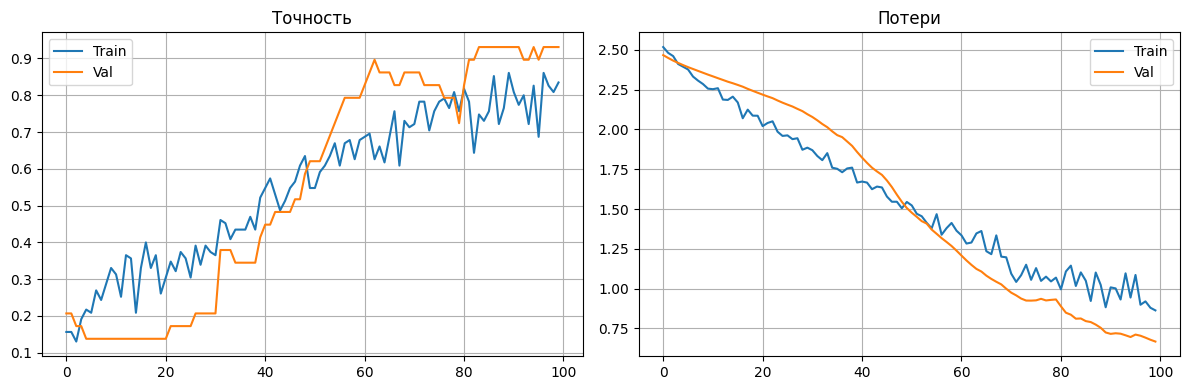

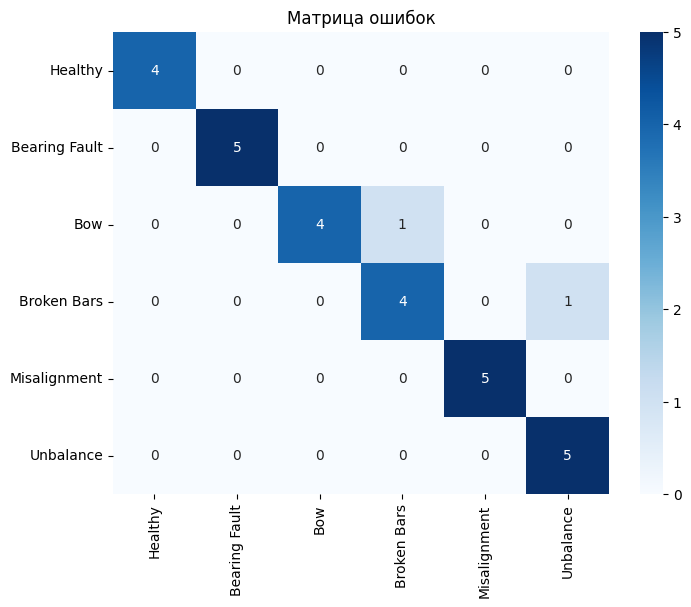

Saved artifact at '/tmp/tmpnwuqsfdo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 84, 1), dtype=tf.float32, name='keras_tensor_83')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  134181696438352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622393424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622393040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622392080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622392272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622392848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622392464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622385552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622393808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622390928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134181622391120: 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import python_speech_features as psf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from scipy import signal
import librosa

data = np.load('/content/hust_signals_processed.npz', allow_pickle=True)
X_raw = data['signals']
y = data['labels']
frequencies = data['frequencies']

print(f"Сигналов: {len(X_raw)}")

def extract_enhanced_features(signal, target_sr=16000):
    decimate_factor = int(25600 / target_sr)
    signal_decimated = signal[::decimate_factor]
    signal_norm = signal_decimated / np.max(np.abs(signal_decimated))

    mfcc = psf.mfcc(signal_norm, samplerate=target_sr, numcep=20, nfilt=40,
                     nfft=1024, winlen=0.025, winstep=0.01, appendEnergy=True)

    mfcc_mean = np.mean(mfcc, axis=0)
    mfcc_std = np.std(mfcc, axis=0)
    mfcc_max = np.max(mfcc, axis=0)
    mfcc_min = np.min(mfcc, axis=0)

    try:
        cent = librosa.feature.spectral_centroid(y=signal_norm.astype(float), sr=target_sr)
        bandwidth = librosa.feature.spectral_bandwidth(y=signal_norm.astype(float), sr=target_sr)
        rolloff = librosa.feature.spectral_rolloff(y=signal_norm.astype(float), sr=target_sr)
        spectral = [np.mean(cent), np.std(cent), np.mean(bandwidth), np.mean(rolloff)]
    except:
        spectral = [0, 0, 0, 0]

    return np.concatenate([mfcc_mean, mfcc_std, mfcc_max, mfcc_min, spectral]).astype(np.float32)

print("Извлечение признаков")
X_features = [extract_enhanced_features(sig) for sig in X_raw]
X = np.array(X_features)
print(f"Признаков на сэмпл: {X.shape[1]}")

def augment_signal(signal, noise_level=0.005):
    noise = np.random.normal(0, noise_level, len(signal))
    augmented = signal + noise
    return augmented / np.max(np.abs(augmented))

X_aug, y_aug = [], []
n_augment = 5

for idx in range(len(X_raw)):
    X_aug.append(X_raw[idx])
    y_aug.append(y[idx])
    for _ in range(n_augment):
        X_aug.append(augment_signal(X_raw[idx]))
        y_aug.append(y[idx])

print(f"Аугментация: {len(X_raw)} -> {len(X_aug)}")

X_aug_features = [extract_enhanced_features(sig) for sig in X_aug]
X_aug = np.array(X_aug_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_aug, np.array(y_aug), test_size=0.2, random_state=42, stratify=np.array(y_aug))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

def create_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(32, 5, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Dropout(0.3),
        layers.Conv1D(16, 3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', kernel_regularizer='l2'),
        layers.Dropout(0.4),
        layers.Dense(32, activation='relu', kernel_regularizer='l2'),
        layers.Dropout(0.3),
        layers.Dense(6, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model((X_train.shape[1], 1))
model.summary()

class ProgressBar(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:
            print(f'Эпоха {epoch+1:3d} - loss: {logs["loss"]:.4f} - acc: {logs["accuracy"]:.4f} - val_loss: {logs["val_loss"]:.4f} - val_acc: {logs["val_accuracy"]:.4f}')

callbacks = [
    ProgressBar(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)
]

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=16, verbose=0, callbacks=callbacks)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_classes == y_test)
print(f"\nТочность на тесте: {accuracy:.4f} ({accuracy*100:.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history['accuracy'], label='Train')
axes[0].plot(history.history['val_accuracy'], label='Val')
axes[0].set_title('Точность')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['loss'], label='Train')
axes[1].plot(history.history['val_loss'], label='Val')
axes[1].set_title('Потери')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

class_names = ['Healthy', 'Bearing Fault', 'Bow', 'Broken Bars', 'Misalignment', 'Unbalance']
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Матрица ошибок')
plt.show()

# Квантизация в int8 для ESP32
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset():
    for i in range(min(50, len(X_train))):
        yield [X_train[i:i+1].astype(np.float32)]

converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model = converter.convert()
with open('motor_fault_model.tflite', 'wb') as f:
    f.write(tflite_model)

print(f"TFLite модель: {len(tflite_model)} байт ({len(tflite_model)/1024:.2f} КБ)")

!xxd -i motor_fault_model.tflite > motor_fault_model.h
print("C-файл для ESP32: motor_fault_model.h")

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"Входной тип: {input_details[0]['dtype']}, выходной тип: {output_details[0]['dtype']}")

test_sample = X_test[0:1]
input_scale, input_zero_point = input_details[0]['quantization']
test_sample_quant = (test_sample / input_scale + input_zero_point).astype(np.int8)

interpreter.set_tensor(input_details[0]['index'], test_sample_quant)
interpreter.invoke()
output_quant = interpreter.get_tensor(output_details[0]['index'])

output_scale, output_zero_point = output_details[0]['quantization']
output = (output_quant.astype(np.float32) - output_zero_point) * output_scale

print(f"Предсказание: класс {np.argmax(output)}, истина: {y_test[0]}")